## DADM Laboratorium 3 - Beztrendowa analiza fluktuacji rytmu serca

#### Witold Prusak i Piotr Pichór

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

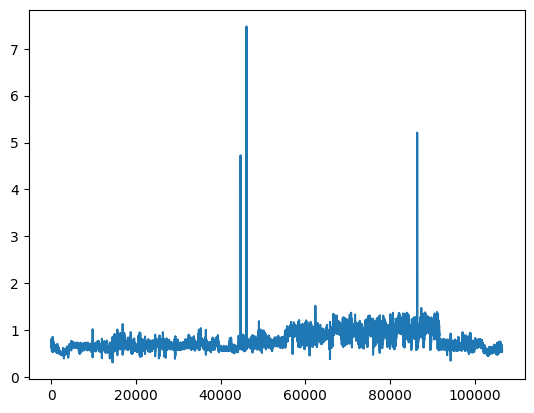

In [3]:
data = pd.read_csv('nsr001.dat', header=None)
data_len = len(data)
data_mean = np.mean(data)
plt.plot(data)

### 1. Całkowanie

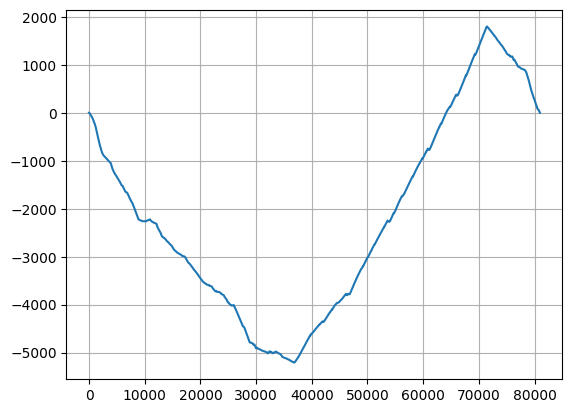

In [4]:
integrated_data = np.cumsum(data - data_mean)
time = np.cumsum(data[0:])
np.insert(time, 0, 0)

plt.plot(time, integrated_data)
plt.grid(True)

### 2. Dopasowanie prostej metodą najmniejszych kwadratów

In [5]:
def least_square_DFA(signal, time, interval_length):
    
    n = interval_length
    intervals = np.floor(len(signal) / n)
    
    signal_split = []
    split_fits = []
    split_x_axis = []
    fitted_lines = []
    
    for i in range(int(intervals)):
        signal_split.append(signal[i*n:(i+1)*n])
        split_fits.append(np.polyfit(range(n), signal_split[i], 1))
        fitted_lines.append(np.polyval(split_fits[i], range(n)))
        split_x_axis.append(time[i*n:(i+1)*n])
        
    split_fits = np.array(split_fits)
    signal_split = np.array(signal_split)
    fitted_lines = np.array(fitted_lines)
    split_x_axis = np.array(split_x_axis)
    return signal_split, split_fits, fitted_lines, split_x_axis
        

Text(0.5, 1.0, 'Interwał 5')

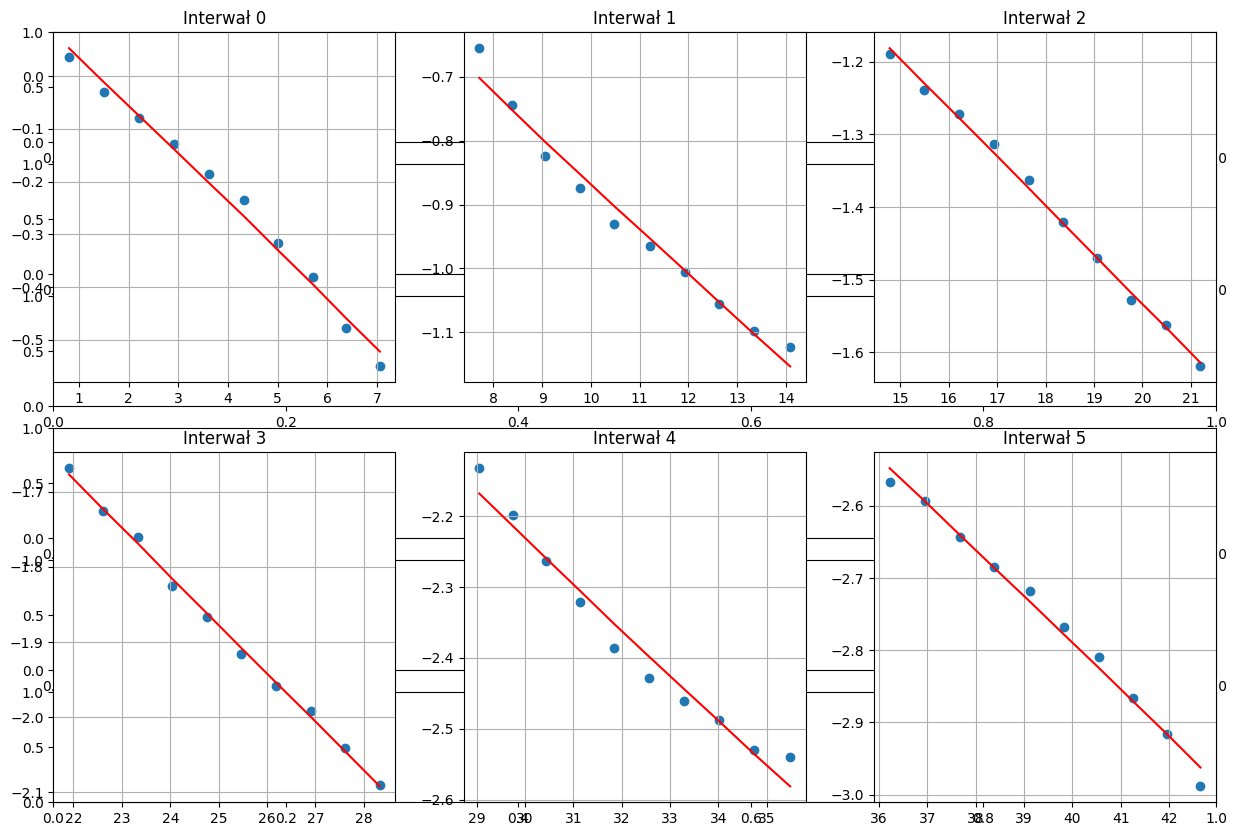

In [6]:
split, trends, trendlines, splits_x = least_square_DFA(integrated_data, time, 10)


plt.subplots(6, figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(splits_x[0], split[0])
plt.plot(splits_x[0], trendlines[0], c='r')
plt.grid(True)
plt.title("Interwał 0")

plt.subplot(2, 3, 2)
plt.scatter(splits_x[1], split[1])
plt.plot(splits_x[1], trendlines[1], c='r')
plt.grid(True)
plt.title("Interwał 1")

plt.subplot(2, 3, 3)
plt.scatter(splits_x[2], split[2])
plt.plot(splits_x[2], trendlines[2], c='r')
plt.grid(True)
plt.title("Interwał 2")

plt.subplot(2, 3, 4)
plt.scatter(splits_x[3], split[3])
plt.plot(splits_x[3], trendlines[3], c='r')
plt.grid(True)
plt.title("Interwał 3")

plt.subplot(2, 3, 5)
plt.scatter(splits_x[4], split[4])
plt.plot(splits_x[4], trendlines[4], c='r')
plt.grid(True)
plt.title("Interwał 4")

plt.subplot(2, 3, 6)
plt.scatter(splits_x[5], split[5])
plt.plot(splits_x[5], trendlines[5], c='r')
plt.grid(True)
plt.title("Interwał 5")

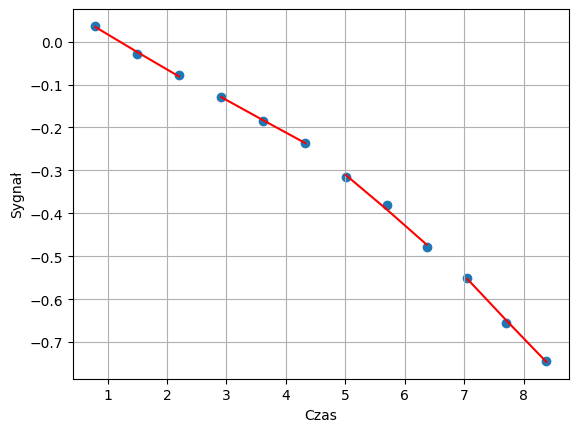

In [7]:
plotting_data = integrated_data[:12]

plt.scatter(time[:12], plotting_data)
plt.grid(True)
plt.xlabel("Czas")
plt.ylabel("Sygnał")

plotting_splits, plotting_trends, plotting_trendlines, plotting_splits_x = least_square_DFA(plotting_data, time[:12], 3)

for i in range(len(plotting_splits)):
    plt.plot(plotting_splits_x[i], plotting_trendlines[i], c='r')

### 3. Średnia kwadratowa fluktuacji

In [21]:
def fluctuation_mean_square(signal, splits, trends):
    N = len(signal)
    
    splits = splits.squeeze(2)
    
    F = np.sqrt(np.sum(splits - trends)**2 / N)
        
    return F

In [22]:
mean_square = fluctuation_mean_square(integrated_data, split, trendlines)

### 4. Wyznaczenie wykresu *log Fn* od *log n*

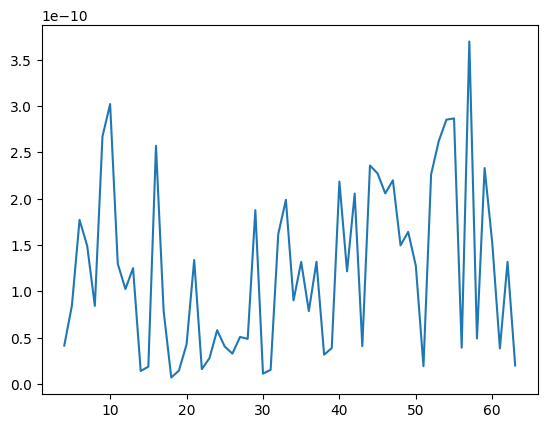

In [24]:
mean_squares = []

for interval_number in range(4, 64):
    slices, _, trends, _ = least_square_DFA(integrated_data, time, interval_number)
    mean_square = fluctuation_mean_square(integrated_data, slices, trends)
    mean_squares.append(np.mean(mean_square))

plt.plot(range(4, 64), mean_squares)

Text(0, 0.5, 'log F(n)')

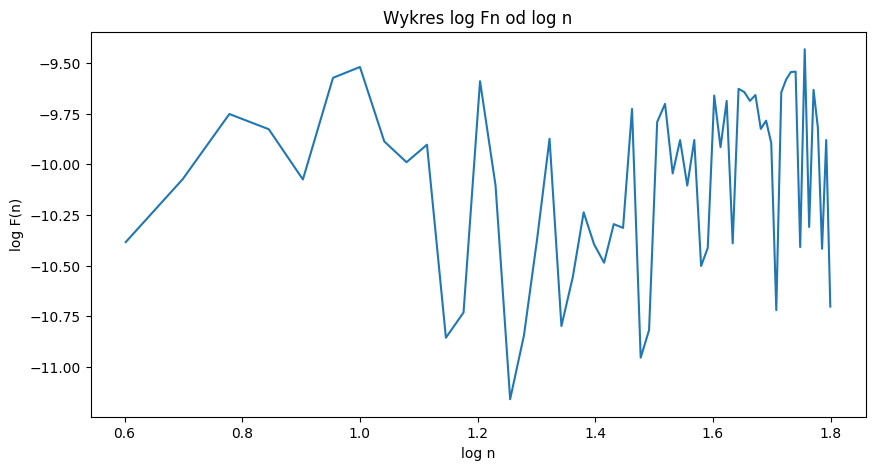

In [29]:
log_F = np.log10(mean_squares)
log_n = np.log10(range(4, 64))

plt.figure(figsize=(10, 5))
plt.plot(log_n, log_F)
plt.title("Wykres log Fn od log n")
plt.xlabel("log n")
plt.ylabel("log F(n)")